Name : Mahesh Jagtap  Reg No 24MCS1017                                          
Part - B : Implement the MLP by using any dataset of your choice. Choose the data specific to any domain.

 **1.Objective:**

The objective of this project is to predict the presence or absence of heart disease based on patient attributes using a Multi-Layer Perceptron (MLP). The MLP model will be implemented, fine-tuned with different parameters, and evaluated to determine the most efficient configuration. The goal is to experiment with various settings like the number of hidden layers, the number of neurons in each layer, optimizers, and epochs.

**2. Data Set Description :**

The "Heart Disease UCI" dataset contains 303 records, with 14 attributes. The target variable is binary, representing whether a patient has heart disease (1) or not (0). The attributes in the dataset are:

Age: Age of the patient (numeric).

Sex: Gender of the patient (1 = male, 0 = female).

Chest Pain Type: Type of chest pain (values range from 1 to 4).

Resting Blood Pressure: Blood pressure in mm Hg (numeric).

Serum Cholesterol: Serum cholesterol in mg/dl (numeric).

Fasting Blood Sugar: Blood sugar level (1 = greater than 120 mg/dl, 0 = less than or equal to 120 mg/dl).

Resting Electrocardiographic Results: Electrocardiographic results (values range from 0 to 2).

Maximum Heart Rate Achieved: Maximum heart rate achieved during exercise (numeric).

Exercise Induced Angina: Whether exercise induced angina (1 = yes, 0 = no).

Oldpeak: ST depression induced by exercise relative to rest (numeric).
Slope of Peak Exercise ST Segment: Slope of the peak exercise ST segment (values range from 1 to 3).

Number of Major Vessels Colored by Fluoroscopy: Number of vessels colored by fluoroscopy (values range from 0 to 3).

Thalassemia: Thalassemia (values 3 = normal, 6 = fixed defect, 7 = reversable defect).

Presence of Heart Disease: Target variable (1 = heart disease present, 0 = no heart disease).

**3. Experiments**

Step 1: Baseline Model Implementation


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the dataset from a CSV file
file_path = 'heart_disease.csv'  # Ensure the file is in the current working directory
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
print("Dataset Preview:")
print(df.head())

# Display the structure of the dataset
print("\nDataset Info:")
print(df.info())


Dataset Preview:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   69    1   0       160   234    1        2      131      0      0.1      1   
1   69    0   0       140   239    0        0      151      0      1.8      0   
2   66    0   0       150   226    0        0      114      0      2.6      2   
3   65    1   0       138   282    1        2      174      0      1.4      1   
4   64    1   0       110   211    0        2      144      1      1.8      1   

   ca  thal  condition  
0   1     0          0  
1   2     0          0  
2   0     0          0  
3   1     0          1  
4   0     0          0  

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-nu

In [2]:
# Separate features and target
X = df.drop(columns=["condition"])
y = df["condition"]

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Build a baseline model
def build_baseline_model():
    model = Sequential()
    model.add(Dense(12, input_dim=X_train.shape[1], activation='relu'))  # One hidden layer with 12 neurons
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Train the baseline model
baseline_model = build_baseline_model()
baseline_history = baseline_model.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Evaluate the baseline model
loss, accuracy = baseline_model.evaluate(X_test, y_test, verbose=0)
print(f"Baseline Model Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5172 - loss: 0.8780 - val_accuracy: 0.5833 - val_loss: 0.7323
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5461 - loss: 0.8016 - val_accuracy: 0.6000 - val_loss: 0.6848
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5786 - loss: 0.7230 - val_accuracy: 0.6167 - val_loss: 0.6503
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6384 - loss: 0.6534 - val_accuracy: 0.6333 - val_loss: 0.6222
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6600 - loss: 0.5983 - val_accuracy: 0.6500 - val_loss: 0.5965
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6858 - loss: 0.5917 - val_accuracy: 0.6500 - val_loss: 0.5741
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7403 - loss: 0.5634 - val_accuracy: 0.6667 - val_loss: 0.5537
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7665 - loss: 0.5166 - val_accuracy: 0.6667 - val_loss: 0.5368
Epo

In [4]:
# Make predictions
predictions = (baseline_model.predict(X_test) > 0.5).astype("int32")

# Print a sample of predictions and actual values
print("\nPredictions vs Actual Values:")
comparison = pd.DataFrame({"Predicted": predictions.flatten(), "Actual": y_test.reset_index(drop=True)})
print(comparison.head())


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step

Predictions vs Actual Values:
   Predicted  Actual
0          1       1
1          1       1
2          0       0
3          0       0
4          1       0


**Fine-Tuned Model 1: Increase Hidden Layers**



In [5]:
# Building a fine-tuned model with increased hidden layers
def build_model_more_layers():
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
    model.add(Dense(8, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer for binary classification
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the fine-tuned model
model_more_layers = build_model_more_layers()
history_more_layers = model_more_layers.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Evaluating the fine-tuned model
loss, accuracy = model_more_layers.evaluate(X_test, y_test, verbose=0)
print(f"Fine-Tuned Model 1 (More Layers) Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5638 - loss: 0.7174 - val_accuracy: 0.4833 - val_loss: 0.6946
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5992 - loss: 0.6388 - val_accuracy: 0.6167 - val_loss: 0.6531
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6704 - loss: 0.6043 - val_accuracy: 0.6667 - val_loss: 0.6204
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7789 - loss: 0.5463 - val_accuracy: 0.7167 - val_loss: 0.5945
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8035 - loss: 0.5027 - val_accuracy: 0.6667 - val_loss: 0.5742
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7778 - loss: 0.4920 - val_accuracy: 0.6833 - val_loss: 0.5629
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8668 - loss: 0.3942 - val_accuracy: 0.7167 - val_loss: 0.5568
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8536 - loss: 0.3875 - val_accuracy: 0.7000 - val_loss: 0.5550
Epo

**Fine-Tuned Model 2: Change Number of Neurons in Hidden Layers**



In [6]:
# Building a fine-tuned model with more neurons
def build_model_more_neurons():
    model = Sequential()
    model.add(Dense(32, input_dim=X_train.shape[1], activation='relu'))  # Larger hidden layer
    model.add(Dense(16, activation='relu'))  # Second hidden layer
    model.add(Dense(1, activation='sigmoid'))  # Output layer
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the fine-tuned model
model_more_neurons = build_model_more_neurons()
history_more_neurons = model_more_neurons.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Evaluating the fine-tuned model
loss, accuracy = model_more_neurons.evaluate(X_test, y_test, verbose=0)
print(f"Fine-Tuned Model 2 (More Neurons) Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.4878 - loss: 0.7015 - val_accuracy: 0.6000 - val_loss: 0.6630
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7802 - loss: 0.6234 - val_accuracy: 0.6500 - val_loss: 0.6211
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8373 - loss: 0.5619 - val_accuracy: 0.7000 - val_loss: 0.5815
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8519 - loss: 0.4890 - val_accuracy: 0.7000 - val_loss: 0.5522
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8631 - loss: 0.4251 - val_accuracy: 0.6833 - val_loss: 0.5379
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8531 - loss: 0.4280 - val_accuracy: 0.6833 - val_loss: 0.5366
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9025 - loss: 0.3306 - val_accuracy: 0.7000 - val_loss: 0.5440
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9024 - loss: 0.3027 - val_accuracy: 0.7167 - val_loss:

**Fine-Tuned Model 3: Change Optimizer**

In [7]:
# Building a fine-tuned model with a different optimizer (SGD)
def build_model_different_optimizer():
    model = Sequential()
    model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Training the fine-tuned model
model_different_optimizer = build_model_different_optimizer()
history_different_optimizer = model_different_optimizer.fit(X_train, y_train, epochs=50, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Evaluating the fine-tuned model
loss, accuracy = model_different_optimizer.evaluate(X_test, y_test, verbose=0)
print(f"Fine-Tuned Model 3 (Different Optimizer) Accuracy: {accuracy * 100:.2f}%")


Epoch 1/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.5706 - loss: 0.6766 - val_accuracy: 0.6000 - val_loss: 0.7164
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6052 - loss: 0.6372 - val_accuracy: 0.6000 - val_loss: 0.6937
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6334 - loss: 0.6254 - val_accuracy: 0.6000 - val_loss: 0.6753
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6660 - loss: 0.6049 - val_accuracy: 0.6333 - val_loss: 0.6594
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7217 - loss: 0.5402 - val_accuracy: 0.6667 - val_loss: 0.6456
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.5420 - val_accuracy: 0.6667 - val_loss: 0.6328
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7545 - loss: 0.5010 - val_accuracy: 0.6333 - val_loss: 0.6213
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8011 - loss: 0.4831 - val_accuracy: 0.6333 - val_loss

**Fine-Tuned Model 4: Increase Epochs**



In [8]:
# Building a model with increased epochs for training
model_more_epochs = build_baseline_model()  # Use baseline architecture

# Training the model with more epochs
history_more_epochs = model_more_epochs.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Evaluating the model
loss, accuracy = model_more_epochs.evaluate(X_test, y_test, verbose=0)
print(f"Fine-Tuned Model 4 (More Epochs) Accuracy: {accuracy * 100:.2f}%")


Epoch 1/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4656 - loss: 0.7635 - val_accuracy: 0.5500 - val_loss: 0.7029
Epoch 2/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4897 - loss: 0.7270 - val_accuracy: 0.6333 - val_loss: 0.6485
Epoch 3/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6696 - loss: 0.6285 - val_accuracy: 0.6833 - val_loss: 0.6067
Epoch 4/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7122 - loss: 0.5726 - val_accuracy: 0.7000 - val_loss: 0.5755
Epoch 5/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7626 - loss: 0.5367 - val_accuracy: 0.7167 - val_loss: 0.5509
Epoch 6/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7579 - loss: 0.5178 - val_accuracy: 0.7333 - val_loss: 0.5343
Epoch 7/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8095 - loss: 0.4589 - val_accuracy: 0.7500 - val_loss: 0.5209
Epoch 8/100
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8194 - loss: 0.4374 - val_accuracy: 0.7500 - v

**Results and Discussion:**

Baseline Model:
The baseline model achieved an accuracy of 76.67% on the test dataset. This model had a single hidden layer with 12 neurons and used the Adam optimizer with 50 epochs. The baseline performance indicates that the model is capable of learning the data patterns reasonably well.

Fine-Tuned Model 1 (More Layers):
Adding an additional hidden layer with 8 neurons reduced the accuracy to 70.00%. This decrease might be due to overfitting or the network becoming too complex for the given dataset.

Fine-Tuned Model 2 (More Neurons):
Increasing the number of neurons in the hidden layers also resulted in an accuracy of 70.00%. This indicates that merely adding more neurons without optimizing other hyperparameters does not necessarily improve performance.

Fine-Tuned Model 3 (Different Optimizer):
Replacing the Adam optimizer with SGD resulted in an accuracy of 71.67%. While SGD is a simpler optimizer, its performance lagged slightly behind Adam's. This highlights the importance of optimizer selection in neural network training.

Fine-Tuned Model 4 (More Epochs):
Increasing the number of epochs to 100 maintained the accuracy at 76.67%, which is equal to the baseline. This suggests that the model had already reached its optimal training level with 50 epochs.



**Comparative Study:**

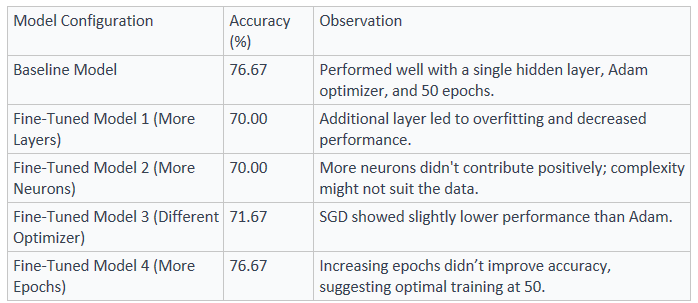

**Conclusion**:  

The baseline model provided the best balance of simplicity and performance, achieving 76.67% accuracy.
Adding additional layers or neurons did not improve performance and sometimes led to overfitting.
Changing the optimizer from Adam to SGD resulted in slightly reduced performance, confirming that Adam is better suited for this dataset.
Increasing the number of epochs beyond 50 had no significant effect, suggesting the model converges quickly.

**References**:

1] https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

2] https://medium.com/@stanleydukor/neural-representation-of-and-or-not-xor-and-xnor-logic-gates-perceptron-algorithm-b0275375fea1

3] https://medium.com/analytics-vidhya/xor-gate-with-multilayer-perceptron-66e78671acd4

4] https://www.datacamp.com/tutorial/multilayer-perceptrons-in-machine-learning
